In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import os
from sklearn.cluster import KMeans
import sklearn.metrics as sm
from sklearn.decomposition import PCA
import seaborn as sns

In [2]:
FF_df = pd.read_csv('form_factors.csv')
TD_x_df = pd.read_csv('gpr_total_density_x_200.csv')
TD_y_df = pd.read_csv('gpr_total_density_y_200.csv')

In [3]:
FF_df = FF_df.transpose()
TD_x_df = TD_x_df.transpose()
TD_y_df = TD_y_df.transpose()

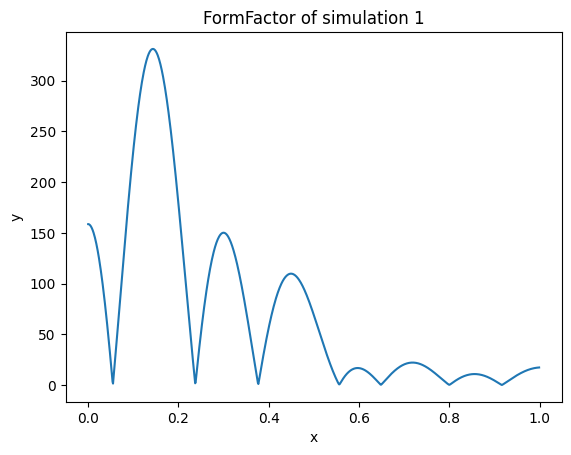

In [4]:
plt.plot(np.arange(0,1,0.001), FF_df[0])
plt.xlabel('x')
plt.ylabel('y')
plt.title('FormFactor of simulation 1')
plt.show()

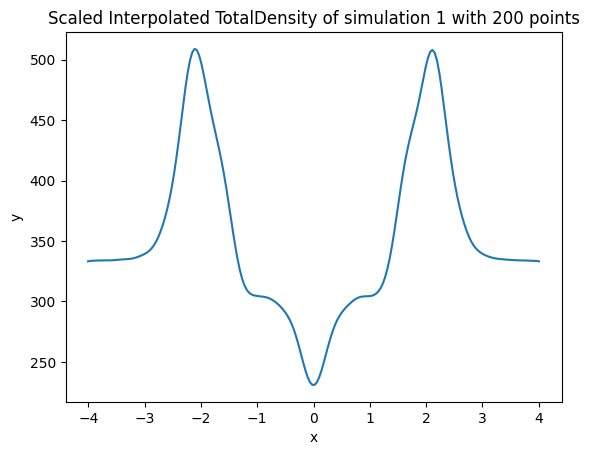

In [5]:
plt.plot(TD_x_df[0],TD_y_df[0])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scaled Interpolated TotalDensity of simulation 1 with 200 points')
plt.show()

In [ ]:
FF_df = FF_df.transpose()
TD_x_df = TD_x_df.transpose()
TD_y_df = TD_y_df.transpose()

FF_df = (FF_df-FF_df.mean())/FF_df.std()
TD_x_df = (TD_x_df-TD_x_df.mean())/TD_x_df.std()
TD_y_df = (TD_y_df-TD_y_df.mean())/TD_y_df.std()

In [4]:
FF_df

,0,1,2,3,4,5,6,7,8,9,...,603,604,605,606,607,608,609,610,611,612
0,0.980720,-0.444256,0.186761,-0.047851,-0.354703,-0.584007,-0.183981,-0.309006,-0.349255,0.267737,...,-0.513892,-0.299718,-0.477219,0.087297,-0.142115,0.840006,-0.459976,-0.427894,0.672328,-0.105556
1,0.980030,-0.444704,0.186284,-0.048252,-0.355220,-0.584411,-0.183635,-0.309460,-0.349860,0.267305,...,-0.514353,-0.299953,-0.477644,0.086667,-0.142717,0.839384,-0.460461,-0.428323,0.671703,-0.105924
2,0.977961,-0.446046,0.184852,-0.049453,-0.356769,-0.585624,-0.182598,-0.310820,-0.351675,0.266009,...,-0.515734,-0.300657,-0.478919,0.084776,-0.144520,0.837520,-0.461915,-0.429612,0.669829,-0.107030
3,0.974512,-0.448282,0.182466,-0.051454,-0.359351,-0.587644,-0.180870,-0.313086,-0.354698,0.263851,...,-0.518037,-0.301829,-0.481043,0.081625,-0.147525,0.834413,-0.464338,-0.431758,0.666705,-0.108872
4,0.969687,-0.451412,0.179127,-0.054255,-0.362964,-0.590472,-0.178453,-0.316257,-0.358928,0.260830,...,-0.521258,-0.303470,-0.484016,0.077216,-0.151730,0.830066,-0.467729,-0.434762,0.662335,-0.111451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.637919,-0.763000,-0.775248,-0.745377,-0.664294,-0.757084,-0.752626,-0.656961,-0.656225,-0.777161,...,-0.857844,-0.764482,-0.705293,-0.861659,-0.689449,-0.738946,-0.677948,-0.761120,-0.640692,-0.750145
996,-0.637355,-0.762537,-0.774302,-0.744959,-0.665308,-0.758153,-0.751415,-0.656542,-0.659345,-0.777468,...,-0.857907,-0.765611,-0.704952,-0.862931,-0.690513,-0.738721,-0.677956,-0.760901,-0.640672,-0.749707
997,-0.636854,-0.762078,-0.773360,-0.744537,-0.666345,-0.759220,-0.750233,-0.656158,-0.662494,-0.777772,...,-0.857928,-0.766756,-0.704615,-0.864157,-0.691557,-0.738505,-0.678050,-0.760640,-0.640653,-0.749303
998,-0.636415,-0.761626,-0.772425,-0.744112,-0.667403,-0.760285,-0.749080,-0.655810,-0.665672,-0.778070,...,-0.857907,-0.767919,-0.704282,-0.865337,-0.692583,-0.738300,-0.678230,-0.760337,-0.640635,-0.748932


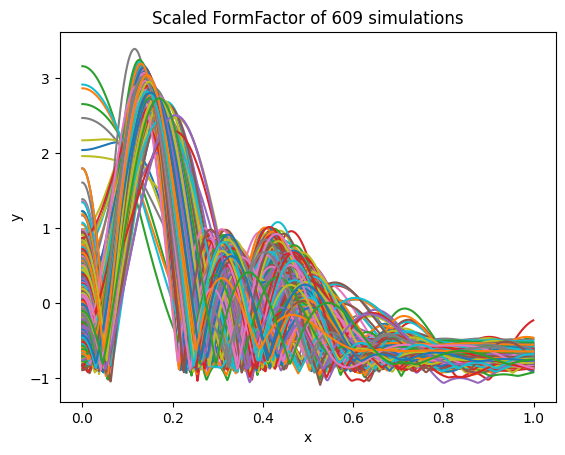

In [3]:
for i in FF_df.columns:
    plt.plot(np.arange(0,1,0.001), FF_df[i])

plt.xlabel('x')
plt.ylabel('y')
plt.title('Scaled FormFactor of 613 simulations')
plt.show()

D:\Users\CellScatter\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


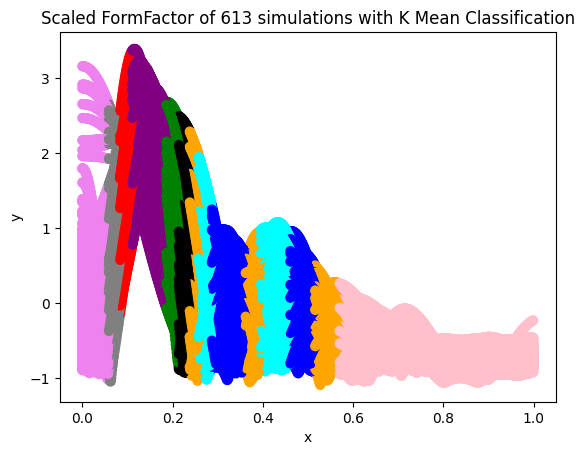

In [6]:
model = KMeans(n_clusters=10)
model.fit(FF_df.values)
colormap = np.array(['pink','purple','blue','red','black','orange', 'cyan', 'green', 'violet', 'grey'])

for i in FF_df.columns:
    plt.scatter(np.arange(0,1,0.001), FF_df[i],c=colormap[model.labels_], s=40)
    
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scaled FormFactor of 613 simulations with K Mean Classification')
plt.show()

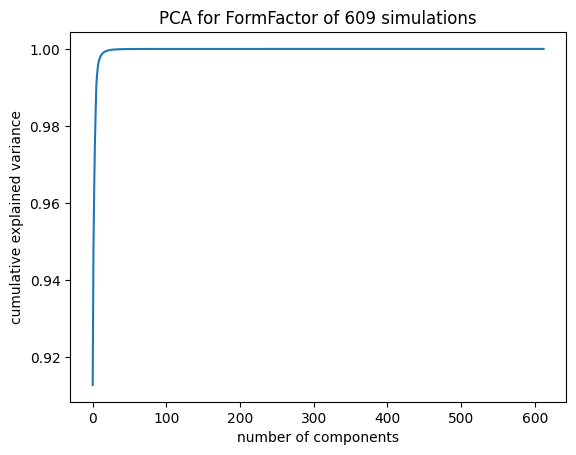

In [10]:
pca = PCA().fit(FF_df.values)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title('PCA for FormFactor of 613 simulations')
plt.show()

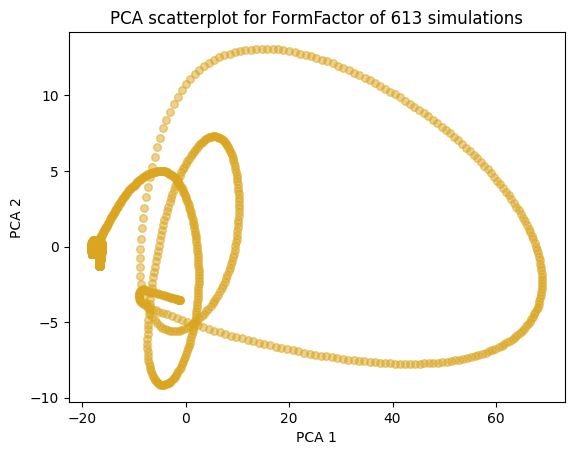

In [11]:
pca = PCA(n_components=2).fit_transform(FF_df.values)
principalDf = pd.DataFrame(pca, columns = ['principal component 1', 'principal component 2'])
plt.scatter(principalDf['principal component 1'],principalDf['principal component 2'],s=30,c='goldenrod',alpha=0.5)
plt.title('PCA scatterplot for FormFactor of 613 simulations')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

D:\Users\CellScatter\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


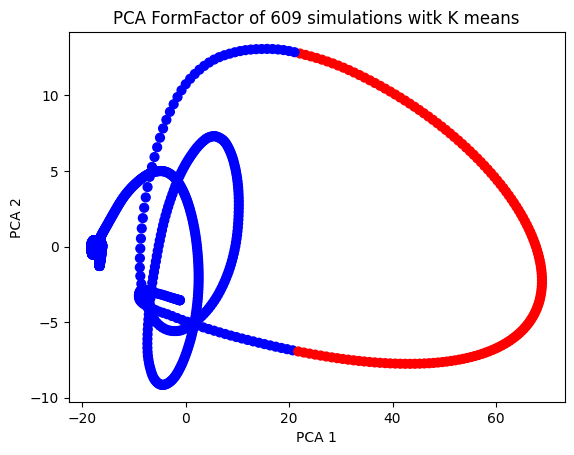

In [12]:
model = KMeans(n_clusters=2)
model.fit(principalDf)
colormap = np.array(['blue','red'])
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'],c=colormap[model.labels_], s=40)
plt.title('PCA FormFactor of 609 simulations witk K means')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

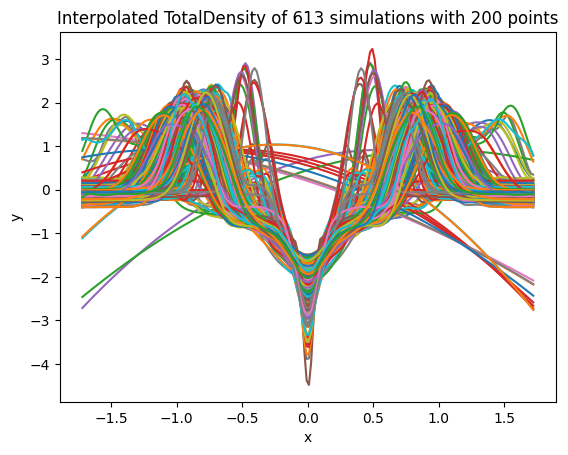

In [13]:
for index in TD_x_df.columns:
    plt.plot(TD_x_df[index],TD_y_df[index])
    
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolated TotalDensity of 613 simulations with 200 points')
plt.show()

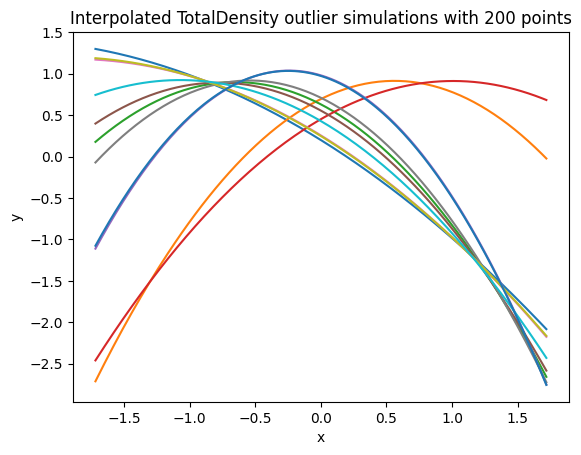

In [14]:
column_indexes = []
index = 0
for value in TD_y_df.iloc[99]:
    if value > -1:
        column_indexes.append(index)
    index = index + 1
    
for index in column_indexes:
    plt.plot(TD_x_df[index],TD_y_df[index])
    
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolated TotalDensity outlier simulations with 200 points')
plt.show()

In [15]:
FF_df = FF_df.drop(column_indexes, axis=1)
TD_x_df = TD_x_df.drop(column_indexes, axis=1)
TD_y_df = TD_y_df.drop(column_indexes, axis=1)

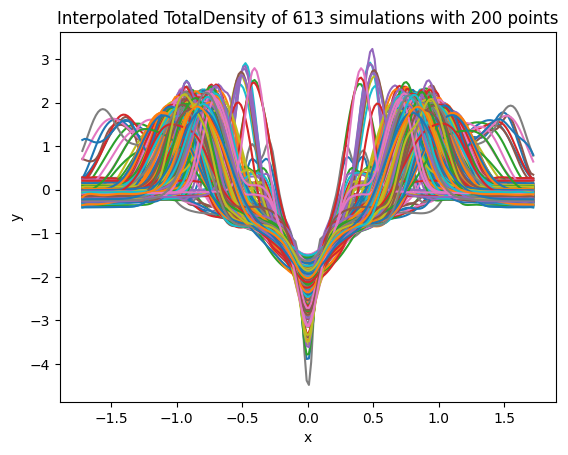

In [16]:
for index in TD_x_df.columns:
    plt.plot(TD_x_df[index],TD_y_df[index])
    
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolated TotalDensity of 613 simulations with 200 points')
plt.show()

In [22]:
TD_x_df = pd.read_csv('gpr_total_density_x_1000.csv')
TD_y_df = pd.read_csv('gpr_total_density_y_1000.csv')

TD_x_df = TD_x_df.transpose()
TD_y_df = TD_y_df.transpose()

TD_x_df = (TD_x_df-TD_x_df.mean())/TD_x_df.std()
TD_y_df = (TD_y_df-TD_y_df.mean())/TD_y_df.std()

TD_x_df = TD_x_df.drop(column_indexes, axis=1)
TD_y_df = TD_y_df.drop(column_indexes, axis=1)

In [23]:
TD_x_df

,0,1,2,3,4,5,6,7,8,9,...,603,604,605,606,607,608,609,610,611,612
0,-1.729454,-1.729454,-1.729454,-1.729454,-1.729454,-1.729454,-1.729454,-1.729454,-1.729454,-1.729454,...,-1.729454,-1.729454,-1.729454,-1.729454,-1.729454,-1.729454,-1.729454,-1.729454,-1.729454,-1.729454
1,-1.725992,-1.725992,-1.725992,-1.725992,-1.725992,-1.725992,-1.725992,-1.725992,-1.725992,-1.725992,...,-1.725992,-1.725992,-1.725992,-1.725992,-1.725992,-1.725992,-1.725992,-1.725992,-1.725992,-1.725992
2,-1.722530,-1.722530,-1.722530,-1.722530,-1.722530,-1.722530,-1.722530,-1.722530,-1.722530,-1.722530,...,-1.722530,-1.722530,-1.722530,-1.722530,-1.722530,-1.722530,-1.722530,-1.722530,-1.722530,-1.722530
3,-1.719067,-1.719067,-1.719067,-1.719067,-1.719067,-1.719067,-1.719067,-1.719067,-1.719067,-1.719067,...,-1.719067,-1.719067,-1.719067,-1.719067,-1.719067,-1.719067,-1.719067,-1.719067,-1.719067,-1.719067
4,-1.715605,-1.715605,-1.715605,-1.715605,-1.715605,-1.715605,-1.715605,-1.715605,-1.715605,-1.715605,...,-1.715605,-1.715605,-1.715605,-1.715605,-1.715605,-1.715605,-1.715605,-1.715605,-1.715605,-1.715605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.715605,1.715605,1.715605,1.715605,1.715605,1.715605,1.715605,1.715605,1.715605,1.715605,...,1.715605,1.715605,1.715605,1.715605,1.715605,1.715605,1.715605,1.715605,1.715605,1.715605
996,1.719067,1.719067,1.719067,1.719067,1.719067,1.719067,1.719067,1.719067,1.719067,1.719067,...,1.719067,1.719067,1.719067,1.719067,1.719067,1.719067,1.719067,1.719067,1.719067,1.719067
997,1.722530,1.722530,1.722530,1.722530,1.722530,1.722530,1.722530,1.722530,1.722530,1.722530,...,1.722530,1.722530,1.722530,1.722530,1.722530,1.722530,1.722530,1.722530,1.722530,1.722530
998,1.725992,1.725992,1.725992,1.725992,1.725992,1.725992,1.725992,1.725992,1.725992,1.725992,...,1.725992,1.725992,1.725992,1.725992,1.725992,1.725992,1.725992,1.725992,1.725992,1.725992


In [24]:
TD_y_df

,0,1,2,3,4,5,6,7,8,9,...,603,604,605,606,607,608,609,610,611,612
0,-0.294200,-0.044163,-0.158772,-0.102216,-0.074599,-0.015730,0.131284,-0.081743,-0.077974,-0.177768,...,-0.055551,-0.101055,-0.038837,-0.146226,-0.091844,-0.246525,-0.061988,-0.065855,-0.221840,-0.171756
1,-0.292794,-0.044933,-0.158864,-0.103937,-0.072333,-0.018592,0.127470,-0.081484,-0.078082,-0.177059,...,-0.052763,-0.100036,-0.038440,-0.146590,-0.088297,-0.246526,-0.058146,-0.064443,-0.221096,-0.161568
2,-0.291594,-0.045857,-0.158998,-0.105505,-0.070380,-0.021199,0.124128,-0.081372,-0.078023,-0.176453,...,-0.050439,-0.099186,-0.038112,-0.146993,-0.085541,-0.246554,-0.055243,-0.063196,-0.220447,-0.152265
3,-0.290572,-0.046893,-0.159164,-0.106928,-0.068713,-0.023557,0.121233,-0.081381,-0.077823,-0.175943,...,-0.048549,-0.098497,-0.037847,-0.147409,-0.083468,-0.246602,-0.053173,-0.062095,-0.219886,-0.143813
4,-0.289704,-0.048002,-0.159353,-0.108210,-0.067307,-0.025677,0.118758,-0.081488,-0.077505,-0.175519,...,-0.047061,-0.097962,-0.037638,-0.147812,-0.081976,-0.246665,-0.051833,-0.061124,-0.219405,-0.136177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.289874,-0.058796,-0.160646,-0.118818,-0.063502,-0.023457,0.099501,-0.086572,-0.080130,-0.174715,...,-0.059069,-0.095635,-0.037933,-0.146162,-0.083549,-0.247523,-0.064092,-0.068005,-0.218923,-0.106660
996,-0.290576,-0.059844,-0.161392,-0.119437,-0.063656,-0.020664,0.098601,-0.085230,-0.080704,-0.175168,...,-0.061687,-0.096630,-0.037735,-0.147324,-0.087303,-0.247791,-0.067091,-0.066524,-0.219307,-0.107422
997,-0.291405,-0.061129,-0.162317,-0.120112,-0.063917,-0.017593,0.097673,-0.083647,-0.081239,-0.175706,...,-0.064841,-0.097850,-0.037499,-0.148798,-0.091896,-0.248139,-0.070475,-0.064649,-0.219768,-0.108419
998,-0.292379,-0.062678,-0.163445,-0.120846,-0.064303,-0.014232,0.096712,-0.081813,-0.081726,-0.176337,...,-0.068590,-0.099311,-0.037224,-0.150627,-0.097412,-0.248579,-0.074276,-0.062359,-0.220311,-0.109673


In [21]:
FF_df

,0,1,2,3,4,5,6,7,8,9,...,603,604,605,606,607,608,609,610,611,612
0,0.980720,-0.444256,0.186761,-0.047851,-0.354703,-0.584007,-0.183981,-0.309006,-0.349255,0.267737,...,-0.513892,-0.299718,-0.477219,0.087297,-0.142115,0.840006,-0.459976,-0.427894,0.672328,-0.105556
1,0.980030,-0.444704,0.186284,-0.048252,-0.355220,-0.584411,-0.183635,-0.309460,-0.349860,0.267305,...,-0.514353,-0.299953,-0.477644,0.086667,-0.142717,0.839384,-0.460461,-0.428323,0.671703,-0.105924
2,0.977961,-0.446046,0.184852,-0.049453,-0.356769,-0.585624,-0.182598,-0.310820,-0.351675,0.266009,...,-0.515734,-0.300657,-0.478919,0.084776,-0.144520,0.837520,-0.461915,-0.429612,0.669829,-0.107030
3,0.974512,-0.448282,0.182466,-0.051454,-0.359351,-0.587644,-0.180870,-0.313086,-0.354698,0.263851,...,-0.518037,-0.301829,-0.481043,0.081625,-0.147525,0.834413,-0.464338,-0.431758,0.666705,-0.108872
4,0.969687,-0.451412,0.179127,-0.054255,-0.362964,-0.590472,-0.178453,-0.316257,-0.358928,0.260830,...,-0.521258,-0.303470,-0.484016,0.077216,-0.151730,0.830066,-0.467729,-0.434762,0.662335,-0.111451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.637919,-0.763000,-0.775248,-0.745377,-0.664294,-0.757084,-0.752626,-0.656961,-0.656225,-0.777161,...,-0.857844,-0.764482,-0.705293,-0.861659,-0.689449,-0.738946,-0.677948,-0.761120,-0.640692,-0.750145
996,-0.637355,-0.762537,-0.774302,-0.744959,-0.665308,-0.758153,-0.751415,-0.656542,-0.659345,-0.777468,...,-0.857907,-0.765611,-0.704952,-0.862931,-0.690513,-0.738721,-0.677956,-0.760901,-0.640672,-0.749707
997,-0.636854,-0.762078,-0.773360,-0.744537,-0.666345,-0.759220,-0.750233,-0.656158,-0.662494,-0.777772,...,-0.857928,-0.766756,-0.704615,-0.864157,-0.691557,-0.738505,-0.678050,-0.760640,-0.640653,-0.749303
998,-0.636415,-0.761626,-0.772425,-0.744112,-0.667403,-0.760285,-0.749080,-0.655810,-0.665672,-0.778070,...,-0.857907,-0.767919,-0.704282,-0.865337,-0.692583,-0.738300,-0.678230,-0.760337,-0.640635,-0.748932


In [6]:
names = []
for i in FF_df.columns:
    names.append(str(i))
    names.append(str(i) + 'x')
    names.append(str(i) + 'y')

FF_TD_df = pd.DataFrame(index=range(1000),columns=[names])

for i in FF_df.columns:
    o_value = []
    x_value = []
    y_value = []
    
    for value in FF_df[i]:
        o_value.append(value)
    for value in TD_x_df[i]:
        x_value.append(value)
    for value in TD_y_df[i]:
        y_value.append(value)
    
    FF_TD_df[str(i)] = o_value
    FF_TD_df[str(i) + 'x'] = x_value
    FF_TD_df[str(i) + 'y'] = y_value
    
FF_TD_df

ValueError: Length of values (200) does not match length of index (1000)

In [28]:
corr = FF_TD_df.corr()
corr

,0,0x,0y,1,1x,1y,2,2x,2y,3,...,609y,610,610x,610y,611,611x,611y,612,612x,612y
0,1.000000,-0.705524,-0.001085,0.889983,-0.705524,0.039749,0.903113,-0.705524,0.030003,0.837119,...,0.019238,0.888341,-0.705524,0.028919,0.956373,-0.705524,0.022030,0.771636,-0.705524,0.012989
0x,-0.705524,1.000000,-0.000177,-0.659660,1.000000,0.000125,-0.684084,1.000000,-0.000118,-0.670234,...,0.000425,-0.663608,1.000000,-0.000902,-0.678129,1.000000,0.000086,-0.647749,1.000000,0.000801
0y,-0.001085,-0.000177,1.000000,-0.024150,-0.000177,0.871958,0.006488,-0.000177,0.993372,0.075096,...,0.977419,-0.001011,-0.000177,0.910042,0.041606,-0.000177,0.924774,0.141936,-0.000177,0.949411
1,0.889983,-0.659660,-0.024150,1.000000,-0.659660,-0.059888,0.984341,-0.659660,-0.001731,0.957070,...,0.006438,0.998526,-0.659660,-0.059999,0.954773,-0.659660,-0.036192,0.889404,-0.659660,-0.050908
1x,-0.705524,1.000000,-0.000177,-0.659660,1.000000,0.000125,-0.684084,1.000000,-0.000118,-0.670234,...,0.000425,-0.663608,1.000000,-0.000902,-0.678129,1.000000,0.000086,-0.647749,1.000000,0.000801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
611x,-0.705524,1.000000,-0.000177,-0.659660,1.000000,0.000125,-0.684084,1.000000,-0.000118,-0.670234,...,0.000425,-0.663608,1.000000,-0.000902,-0.678129,1.000000,0.000086,-0.647749,1.000000,0.000801
611y,0.022030,0.000086,0.924774,-0.036192,0.000086,0.976136,-0.011603,0.000086,0.938526,0.026702,...,0.879615,-0.024990,0.000086,0.982273,0.037413,0.000086,1.000000,0.059071,0.000086,0.991495
612,0.771636,-0.647749,0.141936,0.889404,-0.647749,-0.010163,0.911641,-0.647749,0.149575,0.972888,...,0.187850,0.900137,-0.647749,0.015386,0.866373,-0.647749,0.059071,1.000000,-0.647749,0.053438
612x,-0.705524,1.000000,-0.000177,-0.659660,1.000000,0.000125,-0.684084,1.000000,-0.000118,-0.670234,...,0.000425,-0.663608,1.000000,-0.000902,-0.678129,1.000000,0.000086,-0.647749,1.000000,0.000801
